# Coursera Users

## Import Packages

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
%matplotlib inline
import matplotlib.pyplot as plt

## Load Data

In [4]:
df = pd.read_csv('../data/NMP/users/users_course.csv', index_col='user_id')

## Data Cleaning and Preparation

In [5]:
# Change courses with typos
df.loc[df['short_name']  == 'gestionempresarialpyme', 'short_name'] = 'gestion-empresarial-pyme'
df.loc[df['short_name']  == 'aulaconstructivista', 'short_name'] = 'aula-constructivista'

In [6]:
# Change feature gender with typos
df.loc[df['gender']  == 'male', 'gender'] = 'Male'
df.loc[df['gender']  == 'female', 'gender'] = 'Female'

In [7]:
# Creating Categories
df['gender'] = df['gender'].astype('category')
df['level_education'] = df['level_education'].astype('category')
df['locale'] = df['locale'].astype('category')
df['country'] = df['country'].astype('category')

# We create categories for the courses
df['short_name'] = df['short_name'].astype('category')

# Adding Categories Necesaries
df['level_education'] = df['level_education'].cat.add_categories(['Not Mentioned'])


In [8]:
# Deleting Repeated Users
df = df.drop_duplicates(keep='last')

In [9]:
# We drop the columns that are not necessary for the analysis
df = df.drop(columns=['agreement_accepted', 'start', 'created_at'])

# Filling NaN Values in level_education, and coursera
df = df.fillna({'level_education': 'Not Mentioned', 'lms_user_id': 0})

# Create new Data Frame, with only the users with lms_user_id
df = df[df.lms_user_id != 0]

## EDA

In [10]:
df.describe()

,lms_user_id,email,gender,level_education,country,locale,short_name
count,369,369,369,369,369,369,369
unique,320,321,2,6,21,2,10
top,b2a2eb82258ee3bbe1688aab9791a2ebfe9c5258,maxvalenzuela34@gmail.com,Male,bachelor,CL,en,gestion-empresarial-pyme
freq,4,4,236,190,194,199,106


In [19]:
df.columns

Index(['lms_user_id', 'email', 'gender', 'level_education', 'country',
       'locale', 'short_name'],
      dtype='object')

In [12]:
df.head(5)

,lms_user_id,email,gender,level_education,country,locale,short_name
user_id,,,,,,,
4,dcaa4951beaa883d4f4632128c3806cc7b14e8a0,jmiguelangelsc@gmail.com,Male,master,MX,en,gestion-organizaciones-efectivas
4,dcaa4951beaa883d4f4632128c3806cc7b14e8a0,jmiguelangelsc@gmail.com,Male,master,MX,en,gestion-organizaciones-efectivas
8,92f3ebe50c73bf7dd92fd84145aa3384f3efacd0,esilvajim@gmail.com,Male,bachelor,CL,es,gestion-organizaciones-efectivas
10,fcf8db9c443110c0b544c47cee399cd41f204bd6,fecambra92@gmail.com,Male,master,MX,es,gestion-organizaciones-efectivas
11,b99c4fd3f906d7ce60f2dfee285574544b4b714e,cjavila@uc.cl,Male,bachelor,CL,es,gestion-organizaciones-efectivas


## Data Analysis and Visualizations

#### Gender

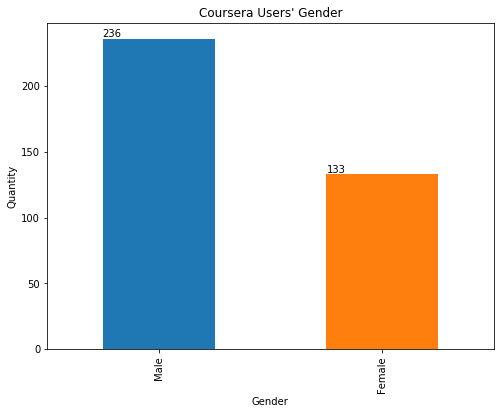

In [13]:
ax = df.gender.value_counts().plot(kind='bar', figsize=(8,6), title="Coursera Users' Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### Education Level

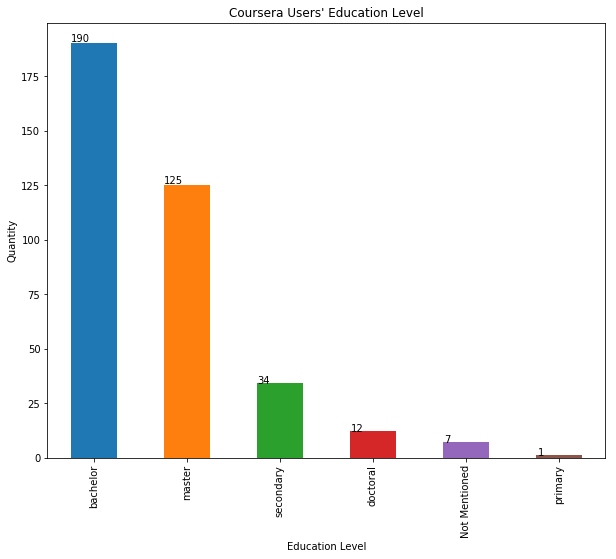

In [14]:
ax = df.level_education.value_counts().plot(kind='bar', figsize=(10,8), title="Coursera Users' Education Level")
ax.set_xlabel("Education Level")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### Country

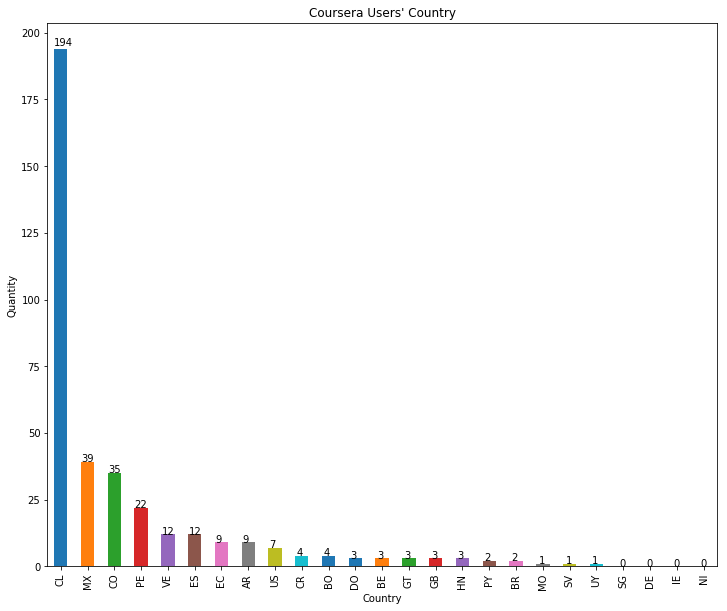

In [15]:
ax = df.country.value_counts().plot(kind='bar', figsize=(12,10), title="Coursera Users' Country")
ax.set_xlabel("Country")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### Locale

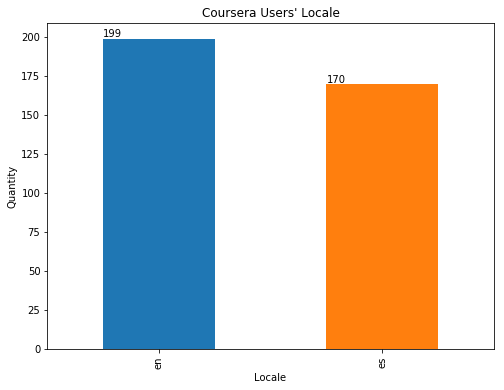

In [16]:
ax = df.locale.value_counts().plot(kind='bar', figsize=(8,6), title="Coursera Users' Locale")
ax.set_xlabel("Locale")
ax.set_ylabel("Quantity")

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

## Export Data

In [18]:
df.to_csv('../data/NMP/cooked_data_coursera_users/users.csv')